## INSAID TELECOM Data Analysis project


<a id="#section1"></a>
### Problem Statement
InsaidTelecom, one of the leading telecom players, understands that customizing offering is very important for its business to stay competitive. Currently, InsaidTelecom is seeking to leverage behavioral data from more than 60% of the 50 million mobile devices active daily in India

In this consulting assignment, Team-1011 build a dashboard to understand user's demographic characteristics based on their mobile usage, geolocation, and mobile device properties. This detail analysis will help millions of developers and brand advertisers around the world pursue data-driven marketing efforts which are relevant to their users and catered to their preferences.

<a id=#section2></a>
## Importing Packages


In [68]:
#Imports
import numpy as np
import pandas as pd
import pandas_profiling
import mysql.connector
from mysql.connector import Error

import matplotlib.pyplot as plt  
import seaborn as sns            
%matplotlib inline
sns.set()

### We are provided with 3 data inputs
- events data set in CSV format
- gender_age data and phone_brand_device_model data are to be fetched from database server


### Fetching the records from database server
- We are writing a function to repeat the same for both gender, phonebrand data
- This is a one time activity to read the data from the tables in the database server
- we will use mysql connector agent for fetching the record.
- we have to install that package using the command ***!pip install mysql-connector-python***

In [2]:
#----------------------------------------------------------------------------------#
#!pip install mysql-connector-python
# Write a function to connec to database and get the records
# This function will take the query and connect to the Capstone1 database, runs the query and gets the records as dataframe
#----------------------------------------------------------------------------------#

def getrecords_from_db_to_df(query):
    try:
        connection = mysql.connector.connect(host='cpanel.insaid.co',
                                             database='Capstone1',
                                             user='student',
                                             password='student')
        if connection.is_connected():
            db_Info = connection.get_server_info()
            print("Connected to MySQL Server version ", db_Info)
            df =  pd.read_sql_query(query, connection)
            #record = cursor.fetchone()
            print("output is done")
            return  df
    except Error as e:
        print("Error while connecting to MySQL", e)
    finally:
        if (connection.is_connected()):
            connection.close()
            print("MySQL connection is closed")
#----------------------------------------------------------------------------------#
#                                  Function end
#----------------------------------------------------------------------------------#

### Getting the data


In [3]:
#Now fetch records using query
query = "select * from gender_age_train"
df_gender_age = getrecords_from_db_to_df(query)

Connected to MySQL Server version  5.6.47-cll-lve
output is done
MySQL connection is closed


In [4]:
query = "select * from phone_brand_device_model"
df_phone_brand_device_model = getrecords_from_db_to_df(query)

Connected to MySQL Server version  5.6.47-cll-lve
output is done
MySQL connection is closed


#### Read events data from CSV

In [6]:
# Read and check the records
df_events = pd.read_csv('.\events_data.csv')
df_events.head(5)

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


#### Let us write a function to find the missing values along with Percentage

In [10]:
def missing_values_with_percent(data):
    total_missed_data = data.isnull().sum().sort_values(ascending = False)
    percent_missed_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total_missed_data, percent_missed_data*100], axis=1, keys=['Total Missed', 'Missed %'])

#### Let us study each dataset now

##### Events Data

In [15]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     int64
device_id    float64
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [19]:
df_events.describe()

,event_id,device_id,longitude,latitude
count,3.252950e+06,3.252497e+06,3.252527e+06,3.252527e+06
mean,1.626476e+06,1.012200e+17,7.815868e+01,2.168851e+01
std,9.390459e+05,5.316758e+18,4.235570e+00,5.789111e+00
min,1.000000e+00,-9.222957e+18,1.256700e+01,8.190110e+00
25%,8.132382e+05,-4.540611e+18,7.583543e+01,1.780171e+01
50%,1.626476e+06,1.726820e+17,7.726814e+01,2.216454e+01
75%,2.439713e+06,4.861813e+18,8.031916e+01,2.868278e+01
max,3.252950e+06,9.222849e+18,9.545946e+01,4.187190e+01


In [20]:
missing_values_with_percent(df_events)

,Total Missed,Missed %
device_id,453,1.392582
latitude,423,1.300358
longitude,423,1.300358
state,377,1.158948
city,0,0.000000
timestamp,0,0.000000
event_id,0,0.000000


#### Observations

- Total Records are 3252950 and Total columns are 7
- 3 objects and 4 numerical values are present
- The following are missing values in the data
    - device_id
    - latitude
    - longitude
    - state

##### Gender and Age Data

In [23]:
df_gender_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [24]:
df_gender_age.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [26]:
df_gender_age.describe()

,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410342
std,5.327150e+18,9.868735
min,-9.223067e+18,1.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


In [69]:
df_gender_age['gender'].value_counts()

M    47904
F    26741
Name: gender, dtype: int64

Text(0, 0.5, 'Age Groups')

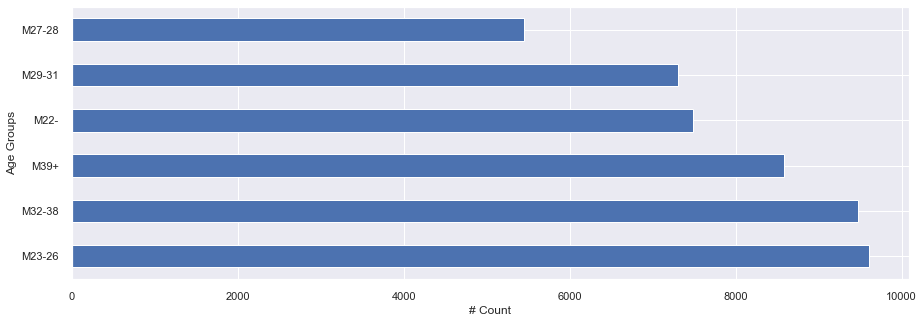

In [70]:
# Male users age group wise to see which group has maximum mobile usage
plt.figure(figsize=(15,5))
df_gender_age[df_gender_age['gender']=='M']['group'].value_counts().plot.barh()
plt.xlabel("# Count")
plt.ylabel("Age Groups")

Text(0, 0.5, 'Age Groups')

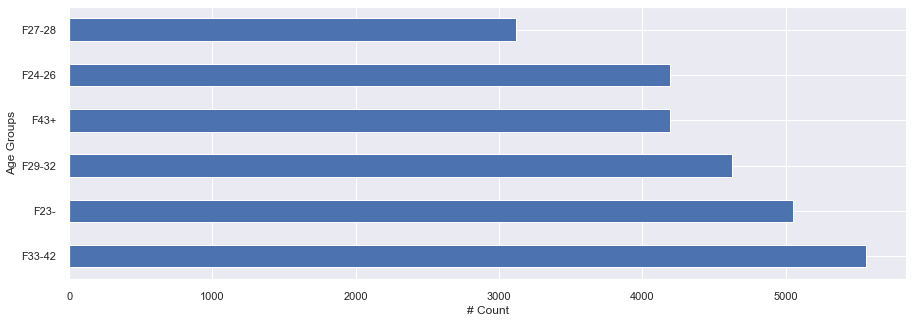

In [73]:
# Female users age group wise to see which group has maximum mobile usage
plt.figure(figsize=(15,5))
df_gender_age[df_gender_age['gender']=='F']['group'].value_counts().plot.barh()
plt.xlabel("# Count")
plt.ylabel("Age Groups")

Text(0.5, 0, 'Age')

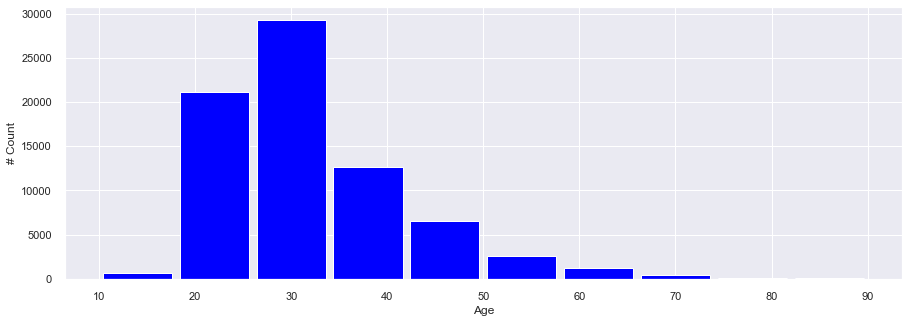

In [75]:
plt.figure(figsize=(15,5))
range = (10,90)
plt.hist(df_gender_age['age'], 10, range, color = 'blue', histtype = 'bar', rwidth = 0.9)
plt.ylabel("# Count")
plt.xlabel("Age")

Text(0.5, 0, 'Age')

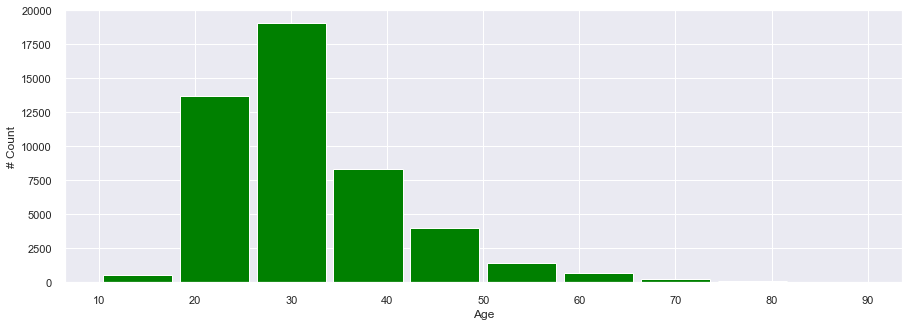

In [78]:
plt.figure(figsize=(15,5))
range = (10,90)
plt.hist(df_gender_age[df_gender_age['gender']=='M']['age'], 10, range, color = 'green', histtype = 'bar', rwidth = 0.9)
plt.ylabel("# Count")
plt.xlabel("Age")

Text(0.5, 0, 'Age')

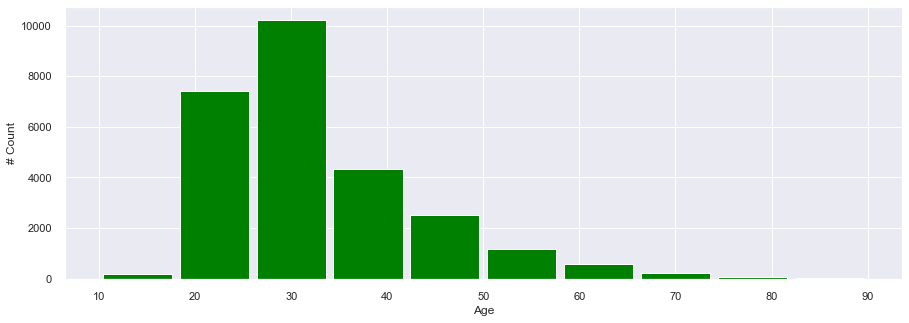

In [81]:
plt.figure(figsize=(15,5))
range = (10,90)
plt.hist(df_gender_age[df_gender_age['gender']=='F']['age'], 10, range, color = 'green', histtype = 'bar', rwidth = 0.9)
plt.ylabel("# Count")
plt.xlabel("Age")

#### Observations
1. People of age group 20 to 40 are using mobiles more as compared to other age groups.
2. Very few people are using mobile actively after the age of 60.
3. Males are using mobile more than females.
4. Mobile is used for people with age more than 10 years.
5. Person whose age is 1 is also using mobile so it is outlier

In [27]:
missing_values_with_percent(df_gender_age)

,Total Missed,Missed %
group,0,0.0
age,0,0.0
gender,0,0.0
device_id,0,0.0


##### Observations

1. There are total 74645 records with 4 columns present in the data
2. 2 columns are numerics and other 2 columns are objects
3. The average age is 31.4 years, with range of 1 year to 96 years (see min, max)
4. The median age value is 29, Also the quartile range is from 25 to 36 years. This indicates that most of the population is in 25 to 36 years and very few outliers are present
5. There are no missing values in this data

##### Phone brand devicemodel data

In [28]:
df_phone_brand_device_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null int64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [29]:
df_phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [31]:
df_phone_brand_device_model.describe()

,device_id
count,8.772600e+04
mean,-5.212557e+15
std,5.330157e+18
min,-9.223322e+18
25%,-4.623331e+18
50%,-3.109802e+16
75%,4.635194e+18
max,9.222849e+18


In [82]:
missing_values_with_percent(df_phone_brand_device_model)

,Total Missed,Missed %
device_model,0,0.0
phone_brand,0,0.0
device_id,0,0.0


In [83]:
df_phone_brand_device_model['phone_brand'].value_counts().head(10)

小米      21645
三星      19211
华为      15181
vivo     7596
OPPO     6717
魅族       5531
酷派       3979
HTC      1272
联想        982
乐视        841
Name: phone_brand, dtype: int64

#### Observations

1. There are total 87726 records with 3 columns present in the data
2. 1 Numeric column and 2 object columns are present in the data.
3. The data has non-english (chinese) characters in the brand and device_model
4. There are no missing values in this data as seen just above


#### Also it is observed that device_id is present in all the datasets, and hence we can use this to merge all the three datasets after the missing values are filled. Apart from this we can also see the type of device_id is float in events_data where it is integer in other two datasets.So, we need to convert the integer values to float


In [66]:
df_gender_age.device_id = df_gender_age.device_id.astype(float)
df_gender_age.dtypes

device_id    float64
gender        object
age            int64
group         object
dtype: object

In [52]:
df_phone_brand_device_model.device_id = df_phone_brand_device_model.device_id.astype(float)
df_phone_brand_device_model.dtypes

device_id       float64
phone_brand      object
device_model     object
dtype: object

### Let us do pre-profiling for each of the list to get more insights

In [54]:
profile_events = pandas_profiling.ProfileReport(df_events, minimal = True)
profile_events.to_file("events_pre_profiling.html")

In [55]:
from IPython.display import IFrame
IFrame(src='events_pre_profiling.html', width=1000, height=500)

In [56]:
profile_gender_age = pandas_profiling.ProfileReport(df_gender_age)
profile_gender_age.to_file("Gender_Age_pre_profiling.html")

In [57]:
IFrame(src='Gender_Age_pre_profiling.html', width=1000, height=500)

In [58]:
profile_phone_brand_devicemodel = pandas_profiling.ProfileReport(df_phone_brand_device_model)
profile_phone_brand_devicemodel.to_file("phone_brand_device_model_pre_profiling.html")

In [59]:
IFrame(src='phone_brand_device_model_pre_profiling.html', width=1000, height=500)

#### Observations

In [60]:
#Write down observations here

##### Replace the chinese values in the brand with English values

In [63]:
lang_mapped_brands = { '华为':'Huawei', '小米':'Xiaomi', 
                         '三星':'Samsung', '魅族':'Meizu','酷派':'Coolpad',
                         '乐视':'LeEco', '联想 ':'Lenovo','奇酷':'Qiku',
                         '斐讯':'Feixun','中国移动':'China Mobile',
                         '天语':'Amagatarai','至尊宝':'Extreme treasure', 
                         '欧博信':'Obersin', '优米':'Quality rice',
                         '努比亚':'Nubian', '惠普':'HP', 
                         '尼比鲁':'Nibiru', '美图':'MitO', '乡米':'Xiangmi', '摩托罗拉':'Motorola',
                         '锤子':'Meng Mi', '富可视':'InFocus','海信':'Hisense',
                         '百立丰':'Bilifeng','一加':'OnePlus', '语信' :'Yuxin', '海尔' :'Haier', 
                         '酷比':'Coolby', '纽曼':'Newman',
                         '波导':'waveguide', '朵唯':'Duowei',
                         '聆韵':'Listening rhyme', '酷珀':'Cupper', '爱派尔':'Aipal', '青葱':'scallion',
                         '果米':'fruit rice', '华硕':'ASUS', '昂达':'Onda', '艾优尼':'Ayuni',
                         '康佳':'Konka', '优购':'Yougo', '邦华':'Banghua', '赛博宇华':'Saibo Yuhua', 
                         '黑米':'Black Rice', '先锋':'Pioneer', 'E派':'E School', 
                         '神舟':'Shenzhou', '诺基亚':'Nokia',
                         '普耐尔':'Puner', '糖葫芦':'Candied Gourd', '亿通':'Yitong', '欧新':'Ou Xin',
                         '米奇':'Mickey', '酷比魔方':'Cube Rubiks Cube', '蓝魔':'Blue Magic', 
                         '小杨树':'Little Poplar','贝尔丰':'Bell Fung', '糯米':'Glutinous Rice',
                         '米歌' :'Mi Ge' , 'E人E本':'E Man E Ben', '西米':'Simi', '大Q':'Big Q',
                         '台电':'Taipower', '飞利浦':'Philips', '唯米':'Vimi', '大显':'Da Xian', '长虹':'Changhong',
                         '维图':'Vitu','青橙':'Green Orange', '本为':'Originally', '虾米':'Shrimp', 
                         '夏新':'Xiaxin', '帷幄':'Virgin', '百加':'Baijia', '欧奇':'Ouqi', 
                         '世纪星':'Century Star', '智镁':'Chi Magnesium',
                         '欧比':'Obi', '基伍':'Kivu', '飞秒':'Femtosecond', '德赛':'Desai', 
                         '易派':'Epai', '谷歌':'Google', '金星数码':'Venus Digital', '广信':'Guangxin', '诺亚信':'Noyaxin',      
                         '凯利通':'Bai Mi', '唯比':'Da Ke Cola', '欧沃':'Bao Jie Xun', 
                         '丰米':'You Yu', '恒宇丰':'Shou Yun', '奥克斯':'Rumi', 
                         '西门子':'Rigao', '欧乐迪':'Wofengfeng','白米':'Mo Le', 
                         '大可乐':'Xian Mi', '宝捷讯':'Kelly Pass',
                         '优语':'Vibe', '首云':'Ovo', '瑞米':'Fengmi', '瑞高':'Hengyufeng', 
                         '沃普丰':'Aux', '摩乐':'Siemens', '鲜米':'Oledi', '梦米': 'Meng Mi'}

In [64]:
df_ph_brand_model = df_phone_brand_device_model.replace(lang_mapped_brands)
df_ph_brand_model['phone_brand'].unique()

array(['vivo', 'Xiaomi', 'OPPO', 'Samsung', 'Coolpad', 'Lenovo', 'Huawei',
       'Qiku', 'Meizu', 'Feixun', 'China Mobile', 'HTC', 'Amagatarai',
       'Extreme treasure', 'LG', 'Obersin', 'Quality rice', 'ZUK',
       'Nubian', 'HP', 'Nibiru', 'MitO', 'Xiangmi', 'Motorola', 'Meng Mi',
       'InFocus', 'LeEco', 'Hisense', 'Bilifeng', 'OnePlus', 'Yuxin',
       'Haier', 'Coolby', 'Newman', 'waveguide', 'Duowei',
       'Listening rhyme', 'TCL', 'Cupper', 'Aipal', 'LOGO', 'scallion',
       'fruit rice', 'ASUS', 'Onda', 'Ayuni', 'Konka', 'Yougo', 'Banghua',
       'Saibo Yuhua', 'Black Rice', 'Lovme', 'Pioneer', 'E School',
       'Shenzhou', 'Nokia', 'Puner', 'Candied Gourd', 'Yitong', 'Ou Xin',
       'Mickey', 'Cube Rubiks Cube', 'Blue Magic', 'Little Poplar',
       'Bell Fung', 'Glutinous Rice', 'Mi Ge', 'E Man E Ben', 'Simi',
       'Big Q', 'Taipower', 'Philips', 'Vimi', 'Da Xian', 'Changhong',
       'Vitu', 'Green Orange', 'Originally', 'Shrimp', 'Xiaxin', 'Virgin',
       'Ba

In [85]:
df_ph_brand_model['phone_brand'].value_counts().head(10)

Xiaomi     21645
Samsung    19211
Huawei     15181
vivo        7596
OPPO        6717
Meizu       5531
Coolpad     3979
HTC         1272
Lenovo       982
LeEco        841
Name: phone_brand, dtype: int64

Text(0.5, 0, 'Phone Brands')

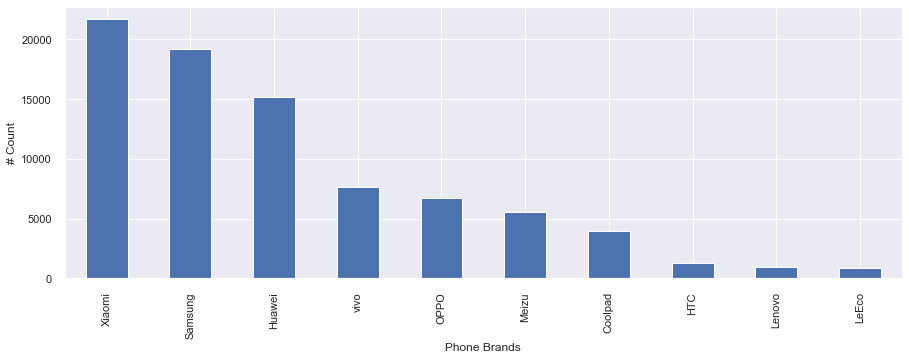

In [87]:
plt.figure(figsize=(15,5))
df_ph_brand_model['phone_brand'].value_counts().head(10).plot.bar()
plt.ylabel("# Count")
plt.xlabel("Phone Brands")

In [89]:
df_ph_brand_model['device_model'].replace({'红米note': 'Redmi note', '荣耀6 plus': 'Redmi 1S',
                                                     '天鉴W900S': 'Tianjian W900S',
                                                     '乐檬X3': 'Music lemon X3', '荣耀6': 'Glory 6', 
                                                     '荣耀畅玩4X': 'Honor Play 4X',
                                                     '荣耀3C': 'Glory 3C', '荣耀6 Plus':'Honor 6 Plus' }, inplace=True)

Text(0.5, 0, 'Device Models')

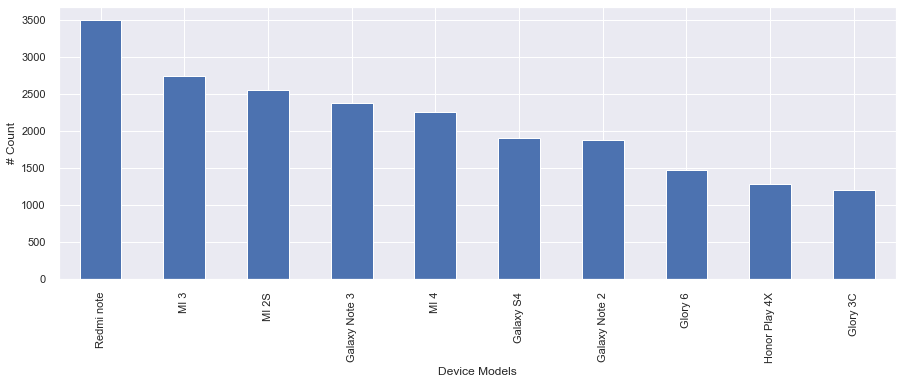

In [90]:
plt.figure(figsize=(15,5))
df_ph_brand_model['device_model'].value_counts().head(10).plot.bar()
plt.ylabel("# Count")
plt.xlabel("Device Models")

In [91]:
#convert the timestamp to a date in a new column event_date
import datetime as dt
df_events['Event_Date']=pd.to_datetime(pd.Series(df_events['timestamp']))
df_events['Event_Date']=df_events['Event_Date'].dt.date

In [92]:
df_events.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,Event_Date
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,2016-05-07
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,2016-05-01
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,2016-05-02
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,2016-05-03
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,2016-05-06


In [93]:
df_events['device_id']=df_events.device_id.abs()
df_events.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,Event_Date
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,2016-05-07
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,2016-05-01
2,605968,3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,2016-05-02
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,2016-05-03
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,2016-05-06


In [97]:
#classify the age group into features
'''
0-2 : infant
2-12: child
13-19: Teenager
20-23: young adults
24-60: adults
>60 : elderly
infant, child, adolescent, young adults, adults, elderly

'''
df_gender_age['age_group_by_name'] = pd.cut(df_gender_age.age,bins=[0,2,12,19,22, 65,99],
                                           labels=['infant','Child', 'teenager','youngadult','Adult','Elderly'])
df_gender_age.head(10)

,device_id,gender,age,group,age_group_by_name
0,-8.076088e+18,M,35,M32-38,Adult
1,-2.897162e+18,M,35,M32-38,Adult
2,-8.260684e+18,M,35,M32-38,Adult
3,-4.938849e+18,M,30,M29-31,Adult
4,2.451335e+17,M,30,M29-31,Adult
5,-1.297075e+18,F,24,F24-26,Adult
6,2.368780e+17,M,36,M32-38,Adult
7,-8.098239e+18,M,38,M32-38,Adult
8,1.765150e+17,M,33,M32-38,Adult
9,1.596610e+18,F,36,F33-42,Adult


### Missing Values treatment

### Handling Missing states

In [98]:
df_events[df_events['state'].isnull()]['city'].unique()

array(['Pune', 'Visakhapatnam', 'Indore', 'Chennai', 'Delhi',
       'Channapatna', 'Jaipur', 'Gangarampur', 'Arambagh'], dtype=object)

In [99]:
#df_events = 
#temp = df_events.copy()
city_state_dict = { "Indore": "MadhyaPradesh","Visakhapatnam" : "AndhraPradesh", "Delhi": "Delhi",
                    "Chennai" : "TamilNadu", "Jaipur":"Rajasthan", "Gangarampur":"WestBengal", 
                    "Arambagh": "WestBengal", "Channapatna": "Karnataka", "Pune": "Maharashtra"}

for key, value in city_state_dict.items():
    df_events.loc[(df_events['city'] == key) \
    & (df_events['state'].isnull()),'state'] = value

In [100]:
df_events['state'].isnull().sum()

0

In [103]:
missing_values_with_percent(df_events)

,Total Missed,Missed %
device_id,453,1.392582
latitude,423,1.300358
longitude,423,1.300358
Event_Date,0,0.000000
state,0,0.000000
city,0,0.000000
timestamp,0,0.000000
event_id,0,0.000000


### Handling missing device_ids

In [105]:
#Let us write a utility function here
def fill_deviceId_from_otherrows_with_deviceid_and_longitude(long):
    #find the device id for the mapped longitude
    deviceid_mappedAlready = df_events[(df_events["longitude"]==long) &
                                           ~(pd.isnull(df_events["device_id"]))].head(1)["device_id"].item()
    return deviceid_mappedAlready

In [111]:
### From the data we observed that the latitude and longitude for a given device_id is unique for the missing device_ids
df_events['device_id'] = df_events.apply(lambda x : fill_deviceId_from_otherrows_with_deviceid_and_longitude
                    (x['longitude']) if pd.isnull(x['device_id']) else  x['device_id'],axis = 1)

In [112]:
df_events.isnull().sum()

event_id        0
device_id       0
timestamp       0
longitude     423
latitude      423
city            0
state           0
Event_Date      0
dtype: int64

#### We can observe that the missing device_id is now zero

### Handling Missing Latitude and Longitude Values

In [115]:
def fill_latlong_from_otherrows_with_latlong_of_deviceid(deviceId):
    #print(long)
    #find the device id for the mapped longitude
    lat_long_already_mapped = df_events[(df_events["device_id"]==deviceId) & 
                                                ~(pd.isnull(df_events["longitude"]))].head(1)["longitude"].values.item()
    return lat_long_already_mapped

In [114]:
df_events["longitude"]=df_events.apply(lambda x : fill_latlong_from_otherrows_with_latlong_of_deviceid
                                       (x['device_id']) if pd.isnull(x['longitude']) else  x['longitude'],axis = 1)

c:\users\oye\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `item` has been deprecated and will be removed in a future version
  """


In [116]:
df_events["latitude"]=df_events.apply(lambda x : fill_latlong_from_otherrows_with_latlong_of_deviceid
                                      (x['device_id']) if pd.isnull(x['latitude']) else  x['latitude'],axis = 1)

In [119]:
df_events.isnull().sum()

event_id      0
device_id     0
timestamp     0
longitude     0
latitude      0
city          0
state         0
Event_Date    0
dtype: int64

### We can observe that all the missing values are filled now

In [120]:
#Let us now work on the copies
events_data = df_events.copy()
phone_brand_device_model_data = df_ph_brand_model.copy()
gender_age_data = df_gender_age.copy()

### Merge the datasets


In [121]:
#Should we do the merge on outer or inner
phone_brand_device_model_data.count()
#outer will have all records


device_id       87726
phone_brand     87726
device_model    87726
dtype: int64

In [126]:
gender_age_data.count()

device_id            74645
gender               74645
age                  74645
group                74645
age_group_by_name    74645
dtype: int64

In [139]:
events_data.dtypes
phone_brand_device_model_data.dtypes
gender_age_data.dtypes

device_id             float64
gender                 object
age                     int64
group                  object
age_group_by_name    category
dtype: object

In [140]:
temp = pd.merge(events_data, phone_brand_device_model_data, on='device_id',how='left')
temp.count()

event_id        3252950
device_id       3252950
timestamp       3252950
longitude       3252950
latitude        3252950
city            3252950
state           3252950
Event_Date      3252950
phone_brand     1656278
device_model    1656278
dtype: int64

In [141]:
all_data = pd.merge(temp, gender_age_data ,on='device_id',how='left')
all_data.count()

event_id             3252950
device_id            3252950
timestamp            3252950
longitude            3252950
latitude             3252950
city                 3252950
state                3252950
Event_Date           3252950
phone_brand          1656278
device_model         1656278
gender               1656278
age                  1656278
group                1656278
age_group_by_name    1656278
dtype: int64